In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
df = pd.read_csv('./Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.corr()

<ipython-input-3-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


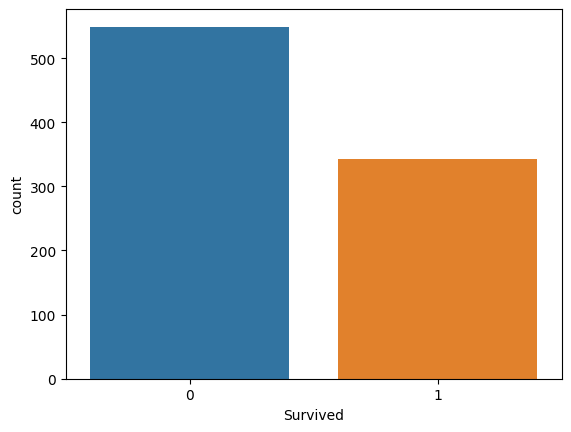

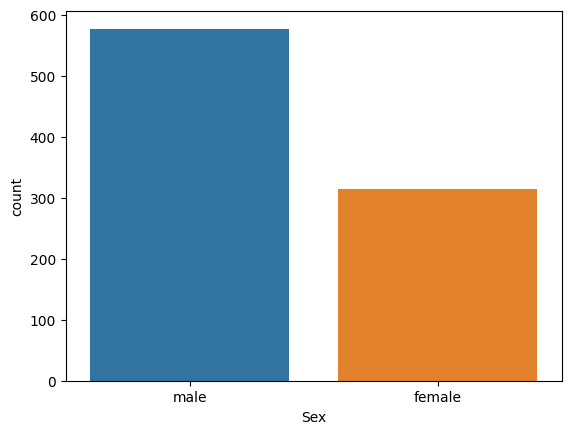

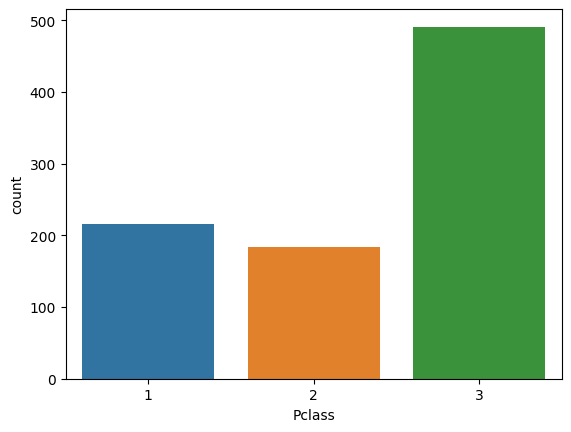

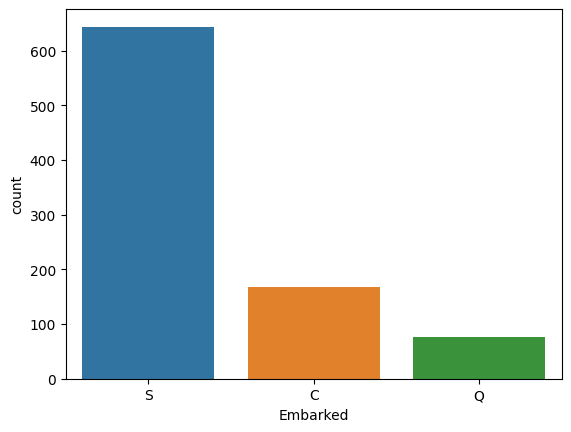

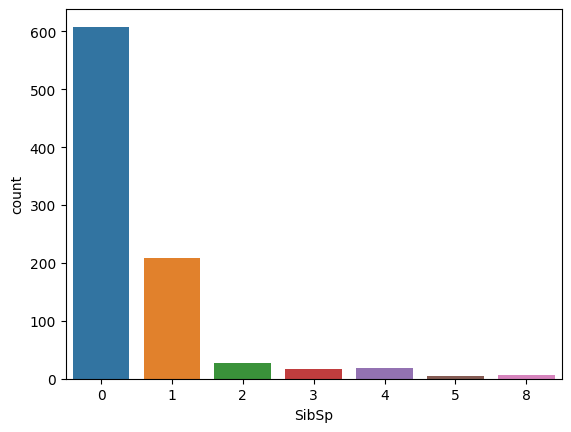

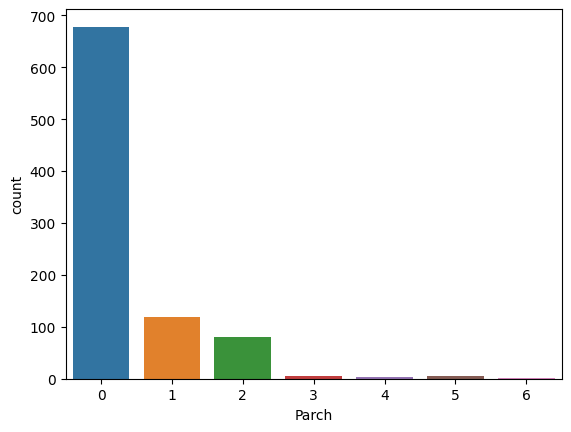

In [6]:
def count_plot(feature):
    # visualize
    sns.countplot(x=feature,data=df)
    plt.show()
    print("\n\n")


#choosing the vairables that will be visualized
categories = ["Survived","Sex","Pclass","Embarked","SibSp", "Parch"]
for x in categories:
    count_plot(x)

In [7]:
# Null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Drop columns
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [10]:
# Fill null values
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [11]:
# Convert categorical values to numerical
label_encoder = preprocessing.LabelEncoder()

df['Embarked'] = label_encoder.fit_transform(df['Embarked'])
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [12]:
# drop null values
df.dropna(inplace=True)
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,0,38.0,1,0,71.2833,0
3,1,1,0,35.0,1,0,53.1000,2
6,0,1,1,54.0,0,0,51.8625,2
10,1,3,0,4.0,1,1,16.7000,2
11,1,1,0,58.0,0,0,26.5500,2


In [14]:
# Split data
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
# Create model
model = LogisticRegression()

# Train model
model.fit(X_train, y_train)

LogisticRegression()

In [24]:
# Predict
y_pred = model.predict(X_test)

print("ACCURACY")
print(accuracy_score(y_test, y_pred))

print("Confusion matrix")
print(confusion_matrix(y_test, y_pred))

print("Classification report")
print(classification_report(y_test, y_pred))


ACCURACY
0.7027027027027027
Confusion matrix
[[ 5  7]
 [ 4 21]]
Classification report
              precision    recall  f1-score   support

           0       0.56      0.42      0.48        12
           1       0.75      0.84      0.79        25

    accuracy                           0.70        37
   macro avg       0.65      0.63      0.63        37
weighted avg       0.69      0.70      0.69        37

